I now realize hastags may be another interesting add on, like #nbapreseason vs #nbafinals. Clearly one of those is more interesting than the other, and perhaps that would lead to a different engagment rate. 


In an exploratory study I'll find the most common hashtags, and plot their engagement rates. 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('husl')
%matplotlib inline

/Users/noahkasmanoff/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
instas = pd.read_csv('Business Analytics/training_setv2.csv',encoding = 'unicode_escape')

In [4]:
instas.isna().sum()
instas.dropna(inplace=True)

In [5]:
#first, obtain a list of stars tagged. 
import re #use regular expression to obtain any time a name is used, find all

posts = " ".join(instas['Description'].unique())
hashtags = list( dict.fromkeys(re.findall('#\w*',posts)) ) 


In [6]:
hashtags

['#NBAFinals',
 '#GatoradeZero',
 '#NBAPlayoffs',
 '#TripleDoubleAlert',
 '#PowerbeatsPro',
 '#LegendaryMoments',
 '#NBABreakdown',
 '#NBAAwards',
 '#NBACombine',
 '#NBAPlaymakers',
 '#PhantomCam',
 '#MtnDew3PT',
 '#TissotBuzzerBeater',
 '#ThisIsYourTime',
 '#NBADraftLottery',
 '#NBAKicks',
 '#StateFarmAssists',
 '#EliteCamp',
 '#NBAonABC',
 '#NBACelebRow',
 '#HeretoCreate',
 '#NBABDAY',
 '#NationalSuperHeroDay',
 '#BecauseSneakers',
 '#GameChangers',
 '#ThisIsyourTime',
 '#nbabreakdown',
 '#BudweiserLegendaryMoments',
 '#NBAGLeague',
 '#GLeagueFinals',
 '#Mobil1Blocks',
 '#NBARooks',
 '#KiaROTM',
 '#KiaPOTM',
 '#WNBADraft',
 '#OneLastDance',
 '#WadeCounty',
 '#L3GACY',
 '#ThankyouChanning',
 '#LeanInTogether',
 '#Curry6',
 '#WeBelieve',
 '#ThankYouChanning',
 '#2WayPlayer',
 '#19HoopClass',
 '#MTNDEWICERisingStars',
 '#NBAGameChangers',
 '#GLeaguePlayoffs',
 '#KumhoHandles',
 '#ATTSlamDunk',
 '#LeaguePassAlert',
 '#GraciasManu',
 '#NBAParis',
 '#ThankYouChr1s',
 '#8',
 '#MilwaukeeGr8'

In [8]:

d = []
for hashtag in hashtags:
    posts_w_hashtag = instas.loc[instas['Description'].str.contains(hashtag)]
    max_eng = posts_w_hashtag.Engagements.max()
    tot_eng = posts_w_hashtag.Engagements.sum()
    n_posts = posts_w_hashtag.Engagements.count()
    min_eng = posts_w_hashtag.Engagements.min()
    avg_eng = posts_w_hashtag.Engagements.mean()
    var_eng = posts_w_hashtag.Engagements.std()
    cluster = posts_w_hashtag.cluster.mean() #average cluster designation, 
    d.append({'hashtags': hashtag, 'max_eng': max_eng,'tot_eng' : tot_eng, 
             'n_posts' : n_posts, 'min_eng' : min_eng, 'avg_eng' : avg_eng, 'cluster' : cluster, 'var_eng' : var_eng})
    
hashtags_df = pd.DataFrame(d)


In [11]:
hashtags_df.sort_values('n_posts',ascending=False)

,avg_eng,cluster,hashtags,max_eng,min_eng,n_posts,tot_eng,var_eng
115,543658.689007,0.575699,#NBA,1129585,127816,2074,1127548121,188625.378358
2,517845.859083,0.543294,#NBAPlayoffs,954448,198217,589,305011211,167797.085072
73,562787.916279,0.553488,#ThisIsWhyWePlay,1053787,178916,430,241998804,203287.771983
18,654759.179775,0.827715,#NBAonABC,1010320,312076,267,174820701,156720.522718
153,673357.314286,0.817143,#KiaTipOff18,1077014,255418,175,117837530,176362.795215
0,561512.662420,0.554140,#NBAFinals,909585,213824,157,88157488,180787.279867
165,652239.114650,0.796178,#NBAPreseason,1053787,191794,157,102401541,187493.425942
6,619415.631579,0.940789,#NBABreakdown,890873,412240,152,94151176,90216.624734
71,569371.111940,0.462687,#NBAAllStar,1129585,221015,134,76295729,234381.836356
10,645666.672269,0.966387,#PhantomCam,838340,383348,119,76834334,85964.653242


In [17]:
hashtags_df.fillna(0,inplace=True)
hashtags_df.describe()


,avg_eng,cluster,max_eng,min_eng,n_posts,tot_eng,var_eng
count,387.000000,387.000000,3.870000e+02,387.000000,387.000000,3.870000e+02,387.000000
mean,549373.358955,0.606035,6.610741e+05,446735.801034,17.870801,9.900048e+06,82988.699943
std,160600.664825,0.396825,2.105504e+05,197111.436125,113.915471,6.219748e+07,96445.492962
min,159402.000000,0.000000,1.594020e+05,127816.000000,1.000000,1.594020e+05,0.000000
25%,426485.550000,0.258333,5.685410e+05,289956.000000,1.000000,6.477495e+05,0.000000
50%,570502.000000,0.666667,6.910570e+05,368920.000000,2.000000,1.110200e+06,30164.468179
75%,672986.219643,1.000000,7.986350e+05,631768.000000,7.000000,3.809917e+06,171198.592635
max,952816.000000,1.000000,1.129585e+06,952816.000000,2074.000000,1.127548e+09,384962.051247


In [22]:
mostpopulartags = hashtags_df.loc[hashtags_df.n_posts > 100]

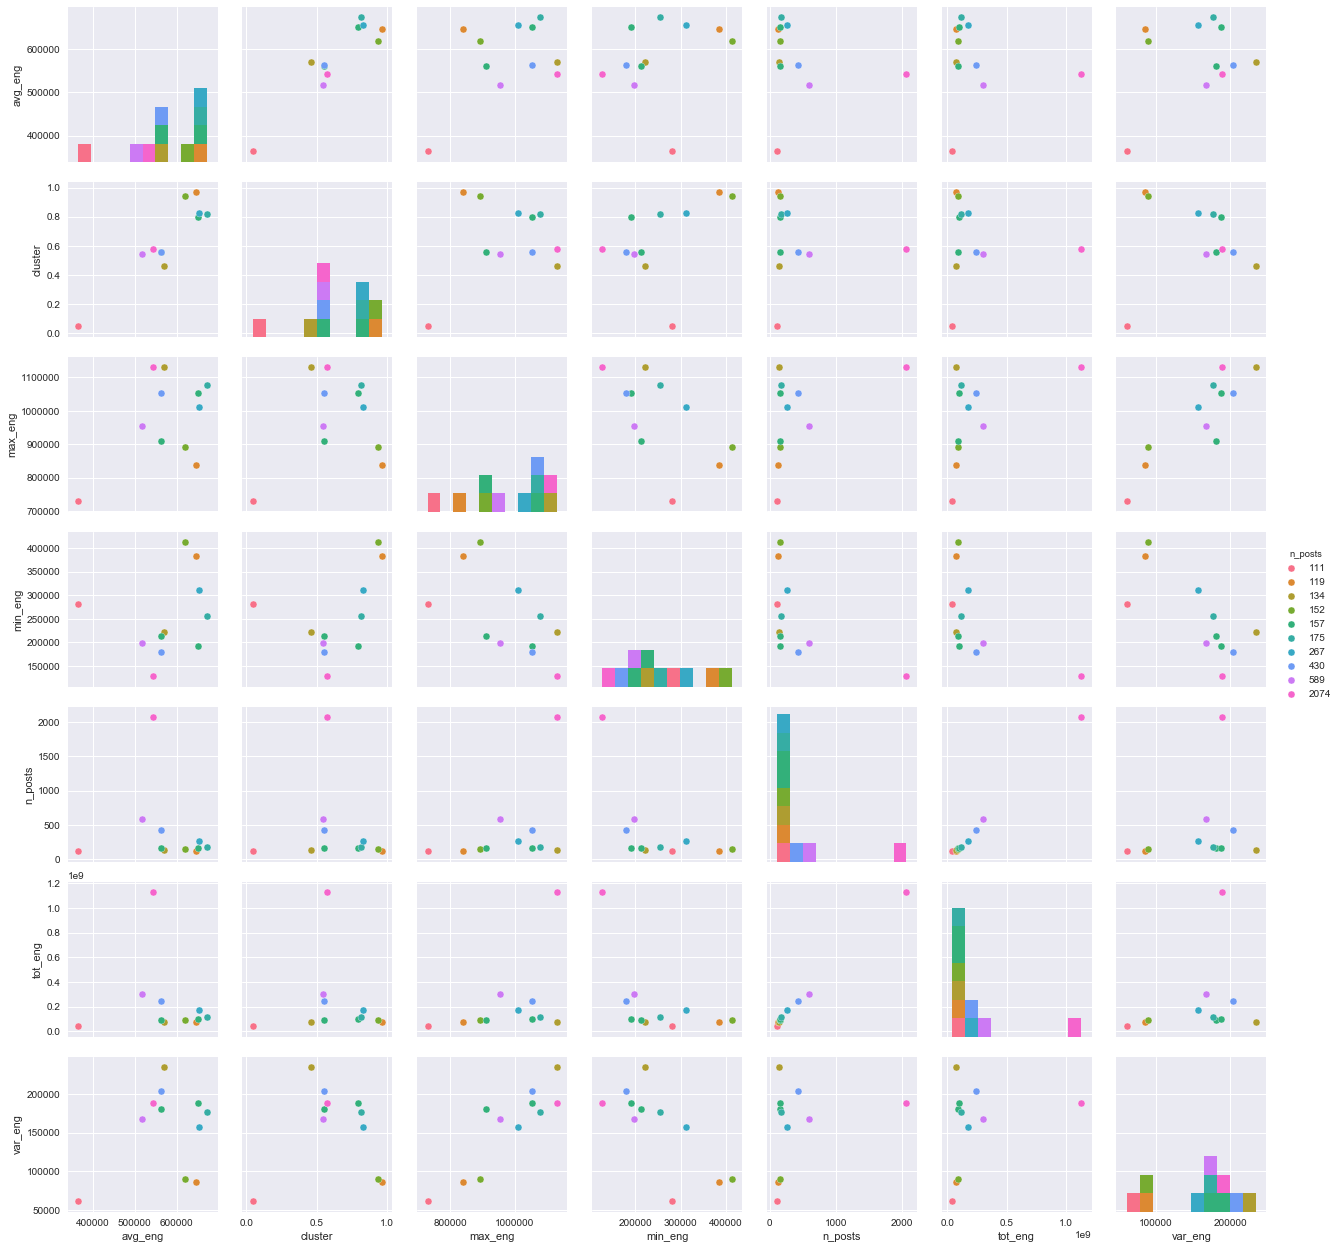

In [24]:
sns.pairplot(mostpopulartags,hue='n_posts')

Something here will help. 